In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
def plotSVMBoundaries(training, label_train, classifier, support_vectors = [], fsize=(6,4), legend_on = True, title = ""):
    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # classifier: sklearn classifier model, must have a predict() function
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 0.01
    min_x = np.floor(min(training[:, 0])) - 0.01
    max_y = np.ceil(max(training[:, 1])) + 0.01
    min_y = np.floor(min(training[:, 1])) - 0.01

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    pred_label = classifier.predict(xy)
    
    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    mean_symbol_ar = np.array(['rd', 'bd', 'md', 'cd','gd','yd','kd','gd','rd','bd'])
    markerfacecolor_ar = np.array(['r', 'b', 'm', 'c','g','y','k','g','r','b'])

    #turn on interactive mode
    plt.figure(figsize=fsize)
    plt.title(title)
    # plt.ion()

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    if len(support_vectors)>0:
        sv_x = support_vectors[:, 0]
        sv_y = support_vectors[:, 1]
        plt.scatter(sv_x, sv_y, s = 100, c = 'green')
        # plot the class training data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    mean_list = [] # for legend
    mean_lis_name = [] # for legend
    for cur_label in np.unique(label_train):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(training[label_train == cur_label, 0],training[label_train == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1
    
        # # plot support vectors

    plt.show()

# Question 1

## Universal Function Approximation

Consider approximation of the function f(x) = e^(-2x) cos(4πx) defined on
the interval x ∈ [0, 1]. Specifically, consider an ANN with one input node, one hidden layer
(using ReLu activations), and one output node (linear activation).

We consider choosing the
weights in this ANN approximation, as developed in lecture, to provide a piecewise linear
approximation of f(x). Specifically on the grid defined by Gℳ = { x_i = i/(ℳ − 1)} M-1, i = 0. This approximation is exact and it is a linear function in between these grid points. 

**(a) Let each weight that is determined by the grid points be a parameter. How many
parameters are in the hidden layer? How many total parameters in the ANN? Specify
how each of the weights and biases in both layers should be chosen to obtain the
approximation.**

**(b) Let f_M(x) denote the approximation using the size M grid G_M. Produce a plot of f(x) and
f_M(x) for M ∈ {2, 4, 8, 16}.**

# Question 2
### Whitening and Simulation of Gaussian Random Vectors

(a) Using np.random.normal(0,1,.) to generate i.i.d. standard normal realization, produce a scatter plot with 5000 realizations of the random vector 𝑥⃗. Explain your method.

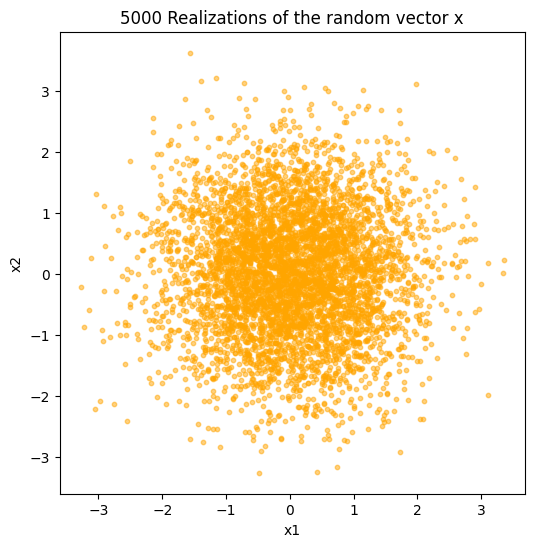

In [ ]:
realizations = 5000
m = np.array([2,1])
covariance_vector = np.array([[4,1],[1,2]])
std_normal = np.random.normal(0, 1, size=(realizations, 2))

# Create scatter plot of x
plt.figure(figsize=(6, 6))
plt.scatter(std_normal[:, 0], std_normal[:, 1], s=10, alpha=0.5, c='orange')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('5000 Realizations of the random vector x')
plt.show()

(b) In this problem, we generate a white Gaussian vector in (i), then color it in (ii), and then whiten in 2 steps ((iii)-(iv)). Then we analyze the results in (v).

**(i) Generate 5000 realizations of a zero-mean, white, Gaussian random vector 𝑤. Plot a scatter plot of these realizations. A white random vector is one with identity covariance matrix and zero mean.**


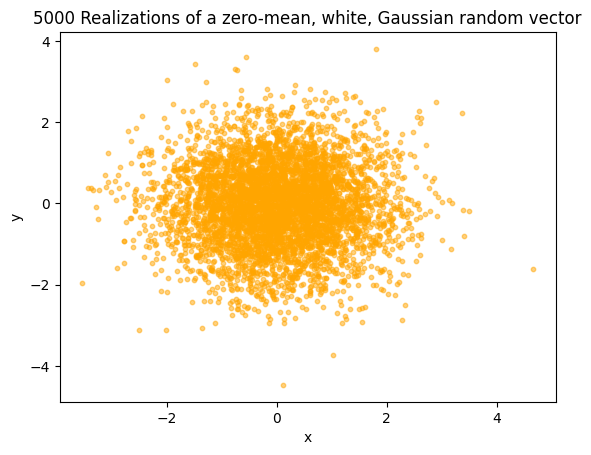

In [ ]:
# Generate two independent arrays of 5000 standard normal random variables
w = np.random.normal(loc = 0, scale = 1, size = (realizations, 2))

# Concatenate the two arrays into a 5000x2 array
# w = np.column_stack((w1))

# Create scatter plot of w
plt.scatter(w[:, 0], w[:, 1], s = 10, alpha = 0.5, c='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('5000 Realizations of a zero-mean, white, Gaussian random vector')
plt.show()

**(ii) Produce a scatter plot for the values of y obtained from the 5000 realizations of w. Compute the sample covariance matrix using these realizations and compare this to the covariance matrix of y as derived.**

In [ ]:
A = np.array([[-1, -1], [2, 4]])
y = (A @ w.T).T
print(f"y[:, 0] | Mean = {np.mean(y[:, 0])}, Variance = {np.var(y[:, 0])}")
print(f"y[:, 1] | Mean = {np.mean(y[:, 1])}, Variance = {np.var(y[:, 1])}")

print(f"Correlation Coefficient {np.corrcoef(y[:, 0], y[:, 1])[0, 1]}")

y[:, 0] | Mean = 0.01567382541001984, Variance = 2.0324527162100567
y[:, 1] | Mean = -0.08460358927376599, Variance = 20.155521117533958
Correlation Coefficient -0.9472250907720495


Since the correlation coefficient is -0.94, it means that there is a strong negative correlation between the two components of y.

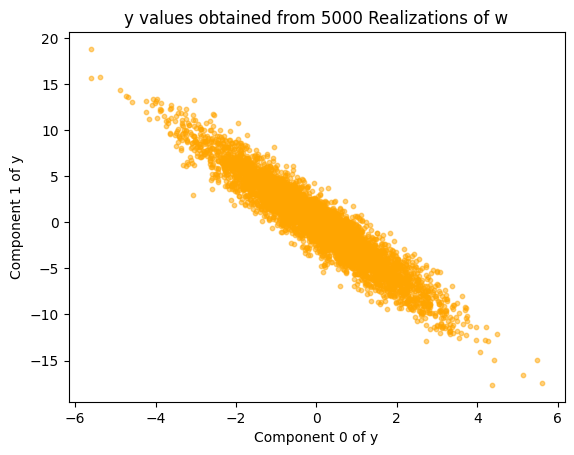

In [ ]:
# scatterplot of y
plt.scatter(y[:, 0], y[:, 1], s = 10, alpha = 0.5, c='orange')
plt.xlabel('Component 0 of y')
plt.ylabel('Component 1 of y')
plt.title('y values obtained from 5000 Realizations of w')
plt.show()

In [ ]:
# Covariance Matrix of y
cov_y = np.cov(y[:, 0], y[:, 1])
cov_y

array([[ 2.03285929, -6.06383398],
       [-6.06383398, 20.15955303]])

**(iii) Consider decorrelating, then whitening y. First, define v = E^T y, where E is the 2 x
2 matrix of orthonormal eigen-vectors of the covariance matrix of y. What is the
covariance matrix of v? Produce a scatter plot of the corresponding 5000 realizations
of v, produced by v = E^T y using the realization of y from the previous part.**

In [ ]:
# Orthogonal Eigen-Vectors of Covariance of y
Evl, E = np.linalg.eig(cov_y)
v = (E.T @ y.T).T
print(f"Covariance of v = \n{np.cov(v[:, 0], v[:, 1])}")

Covariance of v = 
[[ 1.91421017e-01 -1.63528589e-15]
 [-1.63528589e-15  2.20009913e+01]]


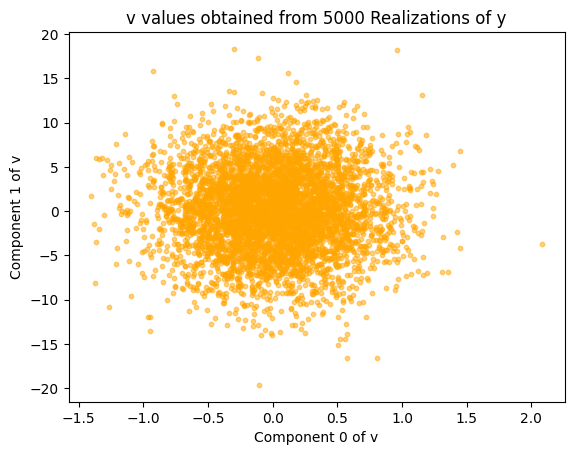

In [ ]:
# Plot of v
plt.scatter(v[:, 0], v[:, 1], s = 10, alpha = 0.5, c='orange')
plt.xlabel('Component 0 of v')
plt.ylabel('Component 1 of v')
plt.title('v values obtained from 5000 Realizations of y')
plt.show()

**(iv) Let z = ⋀^(-1/2) v. What is the covariance matrix of z? Produce a scatter plot of the
corresponding 5000 realizations of z, produced by z = ⋀^(-1/2) v. using the
realization of v from the previous part.**

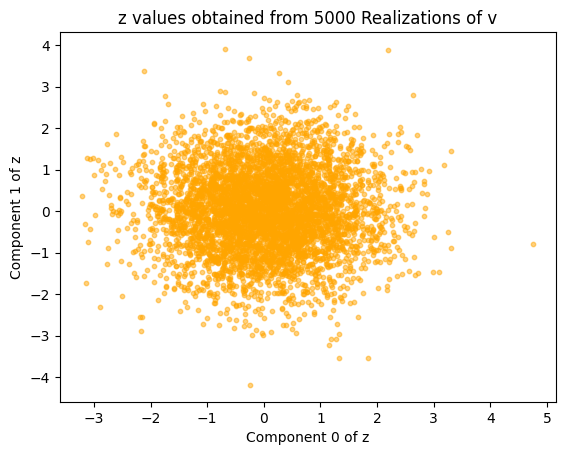

In [ ]:
# E^(-1/2)
E_ = np.diagflat(1 / np.sqrt(Evl))
z = (E_ @ v.T).T

plt.scatter(z[:, 0], z[:, 1], s = 10, alpha = 0.5, c='orange')
plt.xlabel('Component 0 of z')
plt.ylabel('Component 1 of z')
plt.title('z values obtained from 5000 Realizations of v')
plt.show()

**Discuss the relationship between w and z. Specifically, answer the following
questions. What is the pdf of w and the pdf of z? Is z = w -- i.e., since we colored
w to get y, then we whitened y to get z? If not explain why.**

In [ ]:
print(f"Are z and w. equal? {np.array_equal(z, w)}")

Are z and w. equal? False


# Question 3
### Comparison of PCA and MDA on wine dataset.



In [ ]:
from sklearn.preprocessing import StandardScaler

**(a) Baseline for comparison. 
First standardize the dataset**

In [ ]:
dataset = np.genfromtxt("https://raw.githubusercontent.com/akimmi/EE559_hw8/main/wine_data.csv", delimiter = ',')
train = dataset[:, 1:]
labels = dataset[:, 0]
labels[0] = 1.0 # For some reason, first element was NaN where it should be 1

# Standardize Data
scaler = StandardScaler()
norm_train = scaler.fit_transform(train)

**(i) We will pick 2 pairs of features to look at the data as follows: plot the data projected
into x1, x2 space, and also plot the data instead projected into x1, x6 space. For both
plots, use 3 different symbols to denote data points belonging to class 1, 2, and 3.**

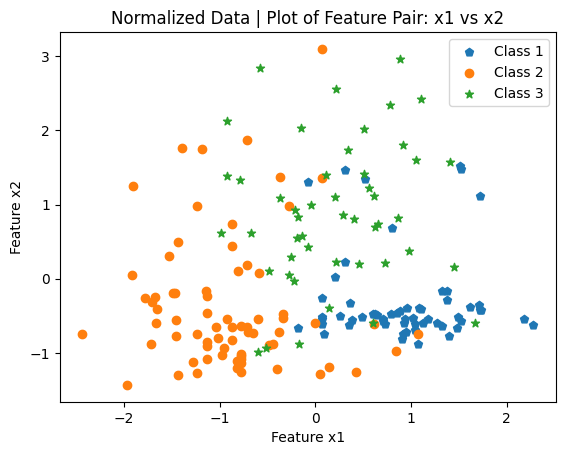

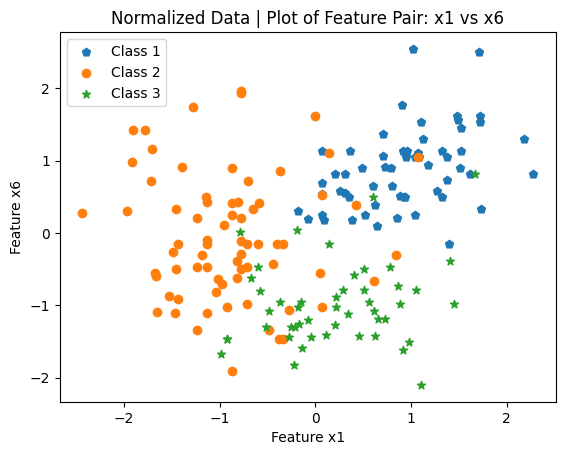

In [ ]:
# function to plot projected data on different features
markers = ["p", "o", "*"]
classes = [1, 2, 3]
def plot_features(f1, f2, train, label, title = "Normalized Data"):
  for i, cls in enumerate(classes):
    plt.scatter(train[label == cls][:, f1 - 1], 
                train[label == cls][:, f2 - 1],
                marker = f"{markers[i]}",
                label = f"Class {cls}")
    
  plt.xlabel(f"Feature x{f1}")
  plt.ylabel(f"Feature x{f2}")

  plt.title(f"{title} | Plot of Feature Pair: x{f1} vs x{f2}")
  plt.legend()
  plt.show()


plot_features(1, 2, norm_train, labels)
plot_features(1, 6, norm_train, labels)

**(ii) Run a multiclass perceptron classifier on the 2D data using only features x1, x2. For
each run, first shuffle the data, then use 20-fold cross validation, and compute the
mean classification error rate over the 20 folds. Also store the weight values from
the result of the first fold.**

**Do a total of 5 runs. Report the mean classification error rate from each cross-val
run, and also report the average and standard deviation of the mean classification
error over the 5 runs.**

**Also report 2 plots: for the run with the lowest classification error rate, plot the
results in a scatter plot (labelled data points of the entire dataset, decision boundaries
and regions based on the stored weights resulting from the first fold); then produce
another similar plot for the run with the highest classification error rate.**

In [ ]:
def run_perceptron_classifier(train, labels):
  kfolds = KFold(20) # 20-fold cross validation
  # Shuffle Data
  train, labels = shuffle(train, labels)
  kfolds.get_n_splits(train)

  class_error_rates = []
  weights = None
  intercept = None

  # Used to save weights from first fold
  first_fold = True

  # Calculate mean classification error over 20 folds
  for (train_ix, test_ix) in kfolds.split(train):
    # Train Perceptron
    perceptron = Perceptron()
    perceptron.fit(train[train_ix],
                   labels[train_ix])
    
    # Save Weights
    if first_fold:
      weights = perceptron.coef_
      intercept = perceptron.intercept_
      first_fold = False

    # Calculate Accuracy
    accuracy = perceptron.score(train[test_ix], 
                                labels[test_ix])
    class_error_rates.append(1 - accuracy)

  return np.mean(class_error_rates), weights, intercept

In [ ]:
def get_plots(features, labels, weights, intercept, title = "", fsize = (6, 6)):
  perceptron = Perceptron()
  perceptron.fit(features, labels)
  perceptron.coef_ = weights
  perceptron.intercept_ = intercept
  plotSVMBoundaries(features,
                    labels,
                    perceptron,
                    fsize = fsize,
                    title = title)

# mcp = Perceptron()
# mcp.fit(wd_train_x_norm[:,:2],wd_train_y)
# mcp.coef_ = weights['Trail_0'][0]
# mcp.intercept_ = weights['Trail_0'][1]
# plotSVMBoundaries(wd_train_x_norm[:,:2],wd_train_y,mcp,title="Lowest Err Rate Weights Using Normalised Data (x1 x2)")

def run_mcp(f1, f2, train_data, labels, fsize = (6, 6)):
  # Selecting features
  features = train_data[:, [f1 - 1, f2 - 1]]
  
  mse_list = []
  weights_list = []
  intercept_list = []

  # Running Multiclass Perceptron 5 times
  for i in range(5):
    mce, weights, intercept = run_perceptron_classifier(features, labels)
    mse_list.append(mce)
    weights_list.append(weights)
    intercept_list.append(intercept)

    print(f"Mean Classification Error for run {i + 1}: {mce}")
  
  # Calculate Average and Standard Deviation of MCE
  print(f"For Multiclass Perceptron with Features {f1} and {f2}:\nAverage MCE = {np.average(mse_list)}\nMCE Standard Deviation = {np.std(mse_list)}")
  
  # Plot Lowest MCE
  lix = mse_list.index(min(mse_list))
  get_plots(features, 
            labels, 
            weights_list[lix], 
            intercept_list[lix], 
            title = f"Lowest MCE for Features {f1} and {f2}",
            fsize = fsize)

  # Plot Highest MCE
  hix = mse_list.index(max(mse_list))
  get_plots(features, 
            labels, 
            weights_list[hix], 
            intercept_list[hix], 
            title = f"Highest MCE for Features {f1} and {f2}",
            fsize = fsize)

Mean Classification Error for run 1: 0.2875
Mean Classification Error for run 2: 0.24861111111111112
Mean Classification Error for run 3: 0.32291666666666663
Mean Classification Error for run 4: 0.27083333333333337
Mean Classification Error for run 5: 0.30972222222222223
For Multiclass Perceptron with Features 1 and 2:
Average MCE = 0.28791666666666665
MCE Standard Deviation = 0.026598582065614586


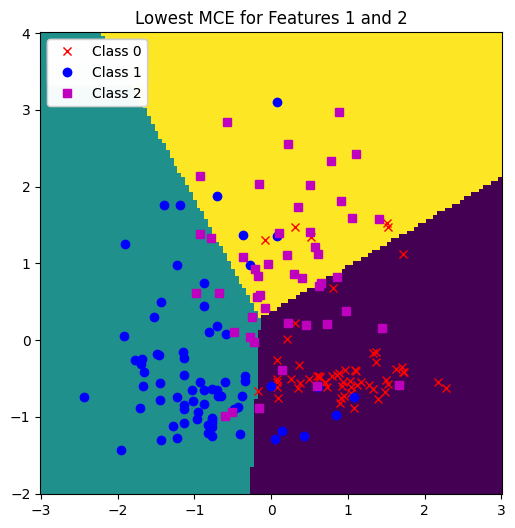

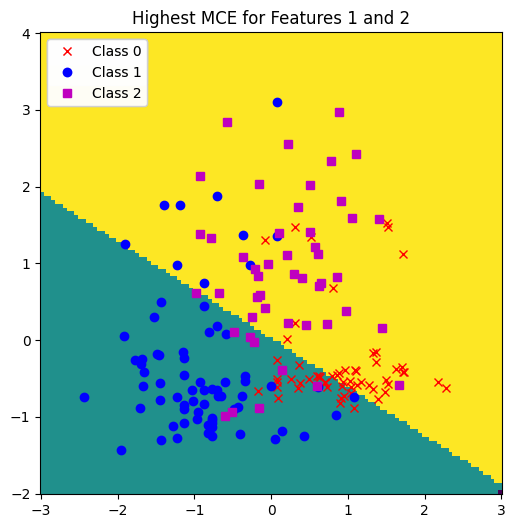

In [ ]:
run_mcp(1, 2, norm_train, labels)

**(iii) Repeat part (ii) for x1, x6**

Mean Classification Error for run 1: 0.20902777777777776
Mean Classification Error for run 2: 0.1513888888888889
Mean Classification Error for run 3: 0.2326388888888889
Mean Classification Error for run 4: 0.18680555555555559
Mean Classification Error for run 5: 0.20347222222222222
For Multiclass Perceptron with Features 1 and 6:
Average MCE = 0.19666666666666668
MCE Standard Deviation = 0.026983076543513083


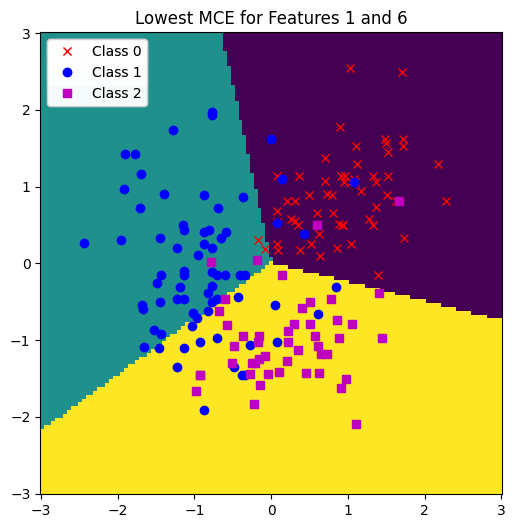

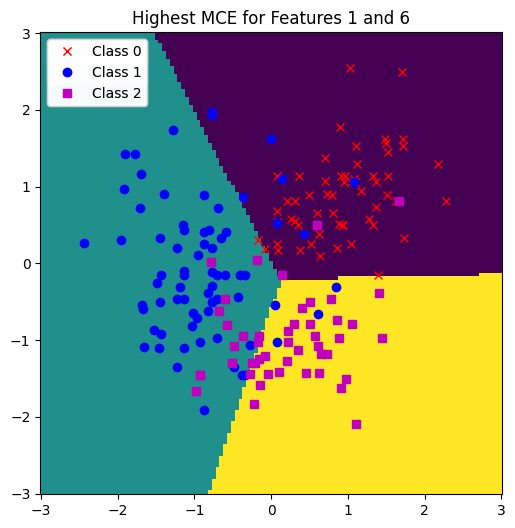

In [ ]:
run_mcp(1, 6, norm_train, labels)

**(b) PCA based on unnormalized dataset.
For this part, use the original dataset with no standardization.
(i) Run PCA, reducing to 2 dimensions, on the entire dataset. Plot the data projected
into the 2D space, using the same symbols as in part (a) to denote the class label of
each data point. Compared with the baseline of (a), do you expect a better
classification result with PCA?**

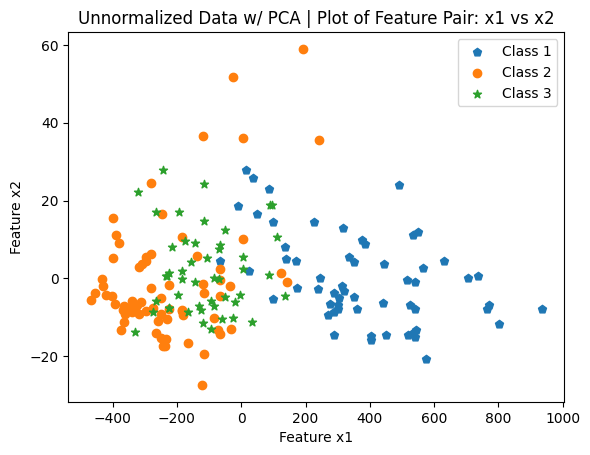

In [ ]:
# Creating PCA
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(train)
plot_features(1, 2, pca_train, labels, title = "Unnormalized Data w/ PCA")

**(ii) Repeat (a)(ii) except for the 2 new features resulting from PCA (plot everything in
the new (x1, x2) space).**

Mean Classification Error for run 1: 0.4256944444444445
Mean Classification Error for run 2: 0.4145833333333334
Mean Classification Error for run 3: 0.4805555555555555
Mean Classification Error for run 4: 0.36249999999999993
Mean Classification Error for run 5: 0.4
For Multiclass Perceptron with Features 1 and 2:
Average MCE = 0.41666666666666663
MCE Standard Deviation = 0.0384172792591955


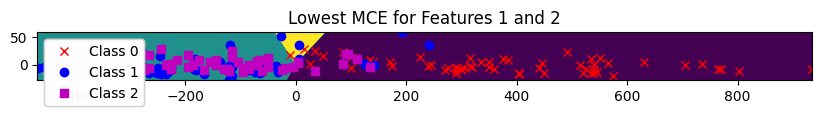

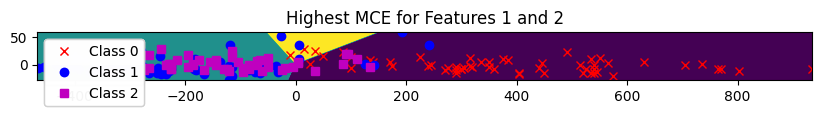

In [ ]:
run_mcp(1, 2, pca_train, labels, fsize = (10, 10))

**(iii) How does it compare with the baselines in (a)(ii)?**

**(c) PCA based on standardized dataset.
Repeat (b)(i)-(ii) except first standardize the data.
(iii) How does PCA with standardized data compare with PCA using unnormalized data?
Why?**

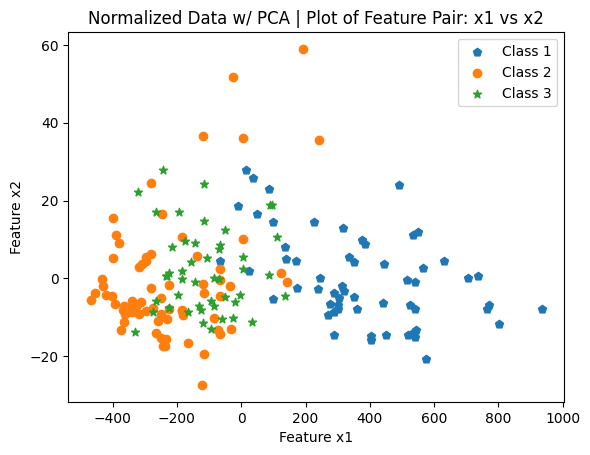

In [ ]:
pca_std = PCA(n_components = 2)
pca_std_train = pca_std.fit_transform(norm_train)
plot_features(1, 2, pca_train, labels, title = "Normalized Data w/ PCA")

Mean Classification Error for run 1: 0.05138888888888891
Mean Classification Error for run 2: 0.05069444444444445
Mean Classification Error for run 3: 0.06319444444444447
Mean Classification Error for run 4: 0.04444444444444447
Mean Classification Error for run 5: 0.06180555555555558
For Multiclass Perceptron with Features 1 and 2:
Average MCE = 0.05430555555555557
MCE Standard Deviation = 0.007128126344642414


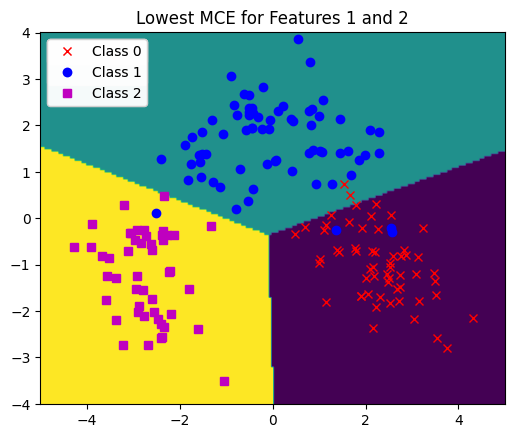

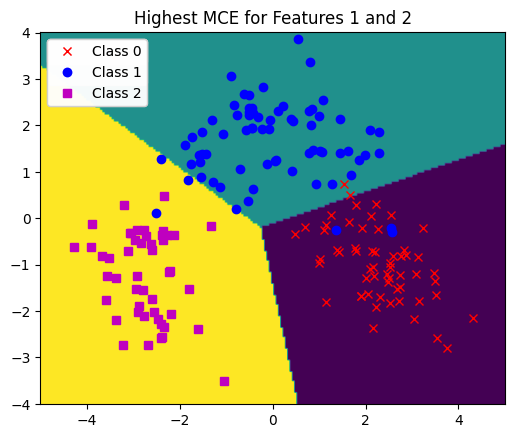

In [ ]:
run_mcp(1, 2, pca_std_train, labels)

**(d)MDA (using LDA as an approximation to MDA).
For this part, first standardize the data.**
**(i) Because this is a 3-class problem, MDA (rather than FLD) is appropriate to use. We
will implement this using instead linear discriminant analysis (LDA), which is
similar to MDA (more detail on the similarities and differences will be given in a
future lecture).
You can use
sklearn.discriminant_analysis.LinearDiscriminantAnalysis.
 on the entire dataset to reduce the dimensionality to 2. Plot the data projected into
the 2D space, using the same symbols as in part (a) to denote the class label of each
data point. How do you expect a linear classifier to do on this data compared with
(b) and (a) above?**

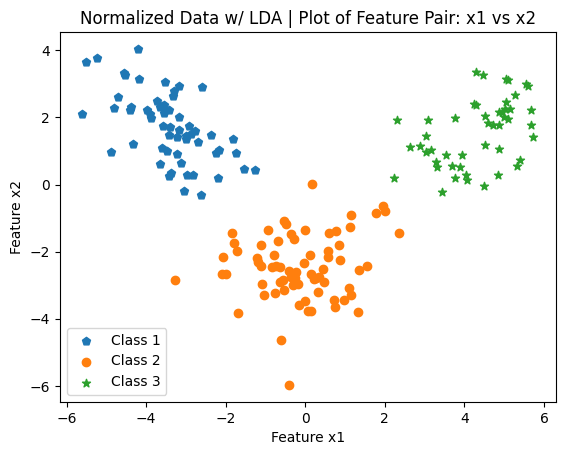

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda_train = lda.fit_transform(norm_train, labels)
plot_features(1, 2, lda_train, labels, title = "Normalized Data w/ LDA")

**(ii) Repeat (a)(ii) except for the 2 new features resulting from MDA/LDA (plot
everything in the new (x1, x2) space).**

Mean Classification Error for run 1: 0.0
Mean Classification Error for run 2: 0.011111111111111117
Mean Classification Error for run 3: 0.011111111111111117
Mean Classification Error for run 4: 0.005555555555555558
Mean Classification Error for run 5: 0.01111111111111111
For Multiclass Perceptron with Features 1 and 2:
Average MCE = 0.007777777777777781
MCE Standard Deviation = 0.004444444444444446


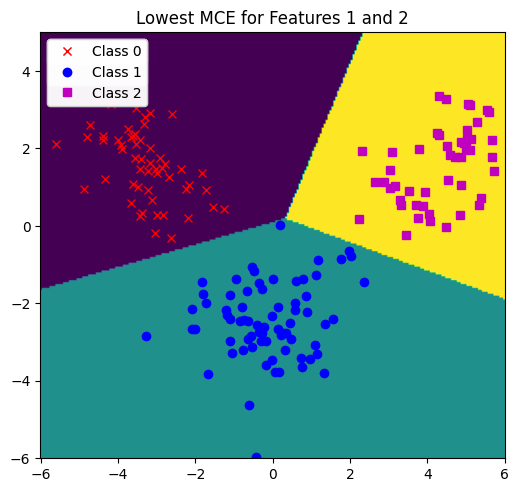

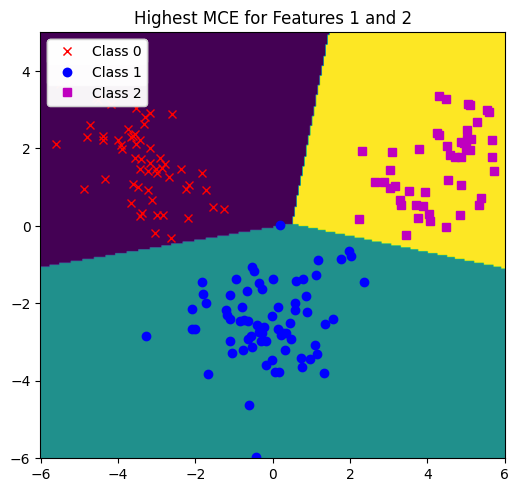

In [ ]:
run_mcp(1, 2, lda_train, labels)

# Question 4